['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']


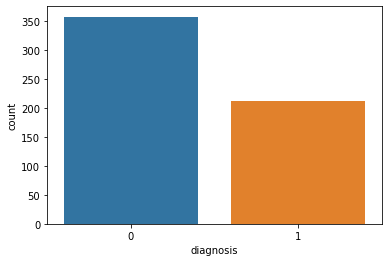

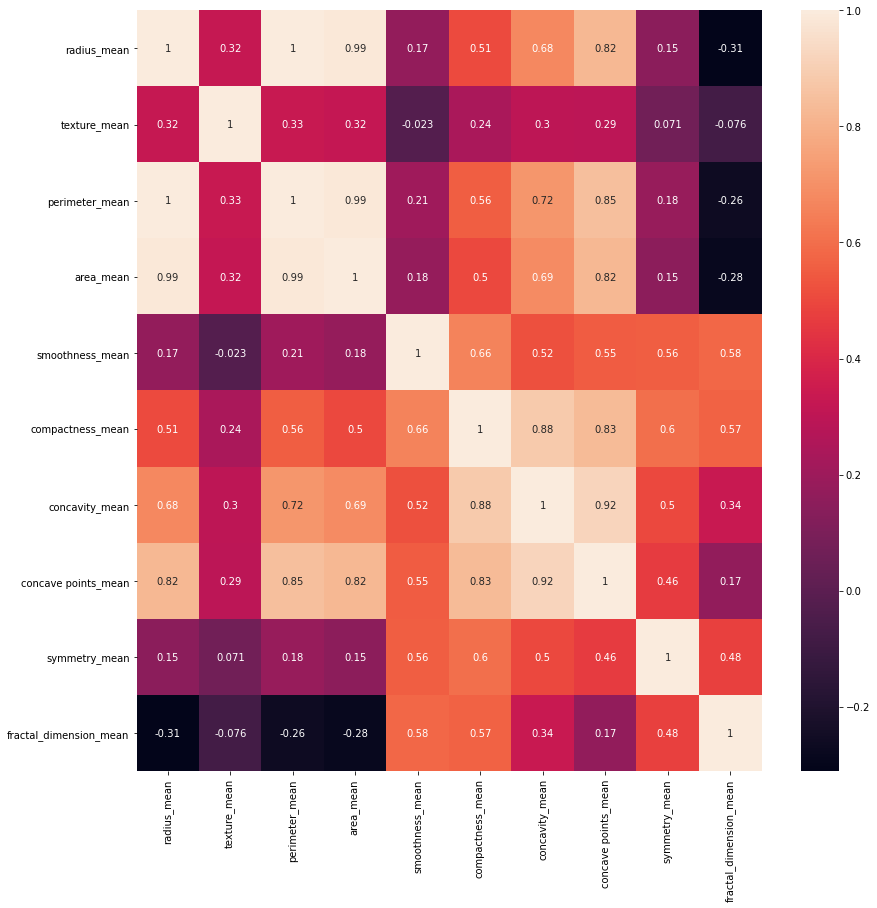

准确率： 0.9298245614035088


In [14]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
# 加载数据集，你需要把数据放到目录中
data = pd.read_csv('data/breast_cancer_data/data.csv')
# 数据探索
# 因为数据集中列比较多，我们需要把dataframe中的列全部显示出来
pd.set_option('display.max_columns',None)
# print(data.columns)
# print(data.head(5))
# print(data.describe())

# 数据清洗
# 将特征字段分成3组
#切割字段2~12，12-22,22-32
features_mean = list(data.columns[2:12])
print(features_mean)
features_se = list(data.columns[12:22])
features_worst = list(data.columns[22:32])
# 开始清洗
# ID列没有用，删除改列
data.drop('id',axis=1,inplace=True)
# 将B两性替换为0，M恶行替换为1
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})

# 特征字段筛选
# 将肿瘤诊断结果可视化
sns.countplot(data['diagnosis'],label='Count')
plt.show()
# 用热力图呈现features_mean字段之间的相关性
corr = data[features_mean].corr()
plt.figure(figsize=(14,14))
# annot=True显示每个方格的数据
sns.heatmap(corr,annot=True)
plt.show()

# 特征选择
# 全特征测试和训练，去掉diagnosis
features_remain = ['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean']

# 准备训练集和测试集
# 抽取30%的数据作为测试集，其余作为训练集
train,test = train_test_split(data,test_size=0.3) # in this our main data is splitted into train and test
# 抽取特征选择的数值作为训练和测试数据
train_x = train[features_remain]
train_y = train['diagnosis']
test_x = test[features_remain]
test_y = test['diagnosis']

# 采用Z-Score规范化数据，保证每个特征维度的数据均值为0，方差为1
ss = StandardScaler()
train_x = ss.fit_transform(train_x)
test_x = ss.fit_transform(test_x)

# 创建SVM分类器
model = svm.SVC()
# 用训练集做训练
model.fit(train_x, train_y)
# 用测试集做预测
prediction = model.predict(test_x)
print('准确率：', metrics.accuracy_score(test_y,prediction))

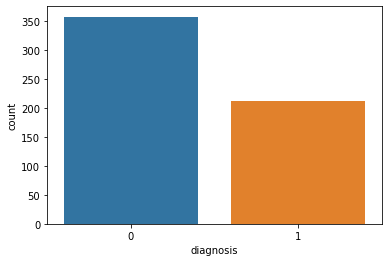

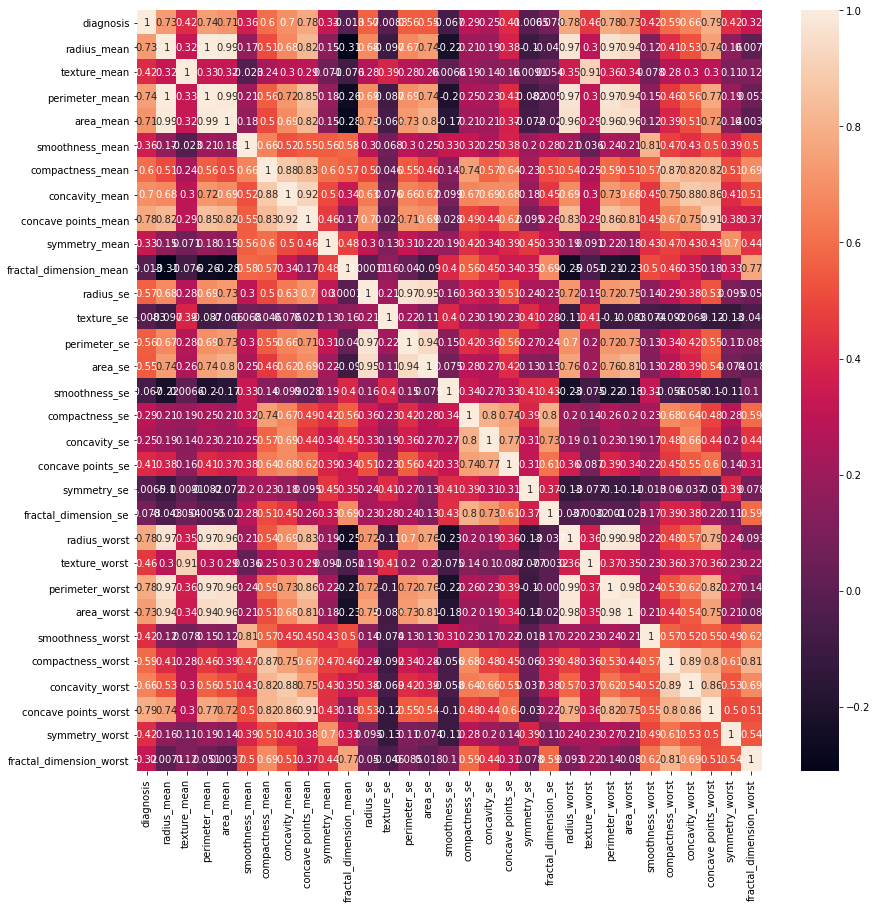

准确率： 0.9707602339181286


In [23]:
# 使用linearSVC

import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

# 加载数据集
data = pd.read_csv('data/breast_cancer_data/data.csv')

# 数据探索
pd.set_option('display.max_columns',None)
# print(data.columns)
# print(data.head(5))
# print(data.describe())

# 数据清洗
# 分组特征字段
features_mean = list(data.columns[2:12])
features_se = list(data.columns[12:22])
features_worst = list(data.columns[22:32])

# 开始清洗
# 删除ID列
data.drop('id',axis=1,inplace=True)
features = list(data.columns)
# 将B,M替换为0，1
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})

# 特征字段筛选
# 诊断结果可视化
sns.countplot(data['diagnosis'], label='Count')
plt.show()
# 热力图呈现fatures_se字段之间相关性
corr=data[features].corr()
plt.figure(figsize=(14,14))
# 每个方格显示数据
sns.heatmap(corr,annot=True)
plt.show()

# 特征选择
features_worst = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
# 准备训练集和测试集
train,test = train_test_split(data,test_size=0.3)
# 抽取特征选择的数值作为训练和测试数据
train_x = train[features_worst]
train_y = train['diagnosis']
test_x = test[features_worst]
test_y = test['diagnosis']

# 采用Z-Score规范化数据，保证每个特征维度的数据均值为0，方差为1
ss = StandardScaler()
train_x = ss.fit_transform(train_x)
test_x = ss.fit_transform(test_x)

# 创建SVM分类器
model = svm.LinearSVC()
# 用训练集做训练
model.fit(train_x,train_y)
# 用测试集做预测
prediction = model.predict(test_x)

print('准确率：', metrics.accuracy_score(test_y, prediction))